[51.87433478 10.98186653  9.68023228]
[0.82214767 0.07507314 0.03659595]


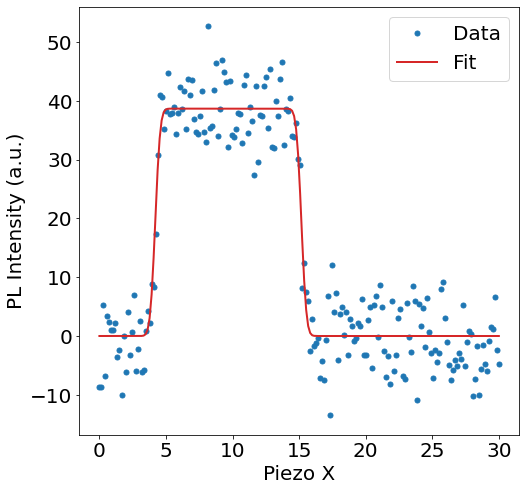

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy.optimize import curve_fit

def generate_equation(x, a, w, d, c):
    """
    a: amplitude
    w: fwhm of the gaussian
    d: width of the top-hat
    c: center of the top-hat
    """
    return 0.25 * a * w * np.sqrt(np.pi / np.log(2)) * (
        erf(np.sqrt(np.log(2)) * (-2 * c + d + 2 * x) / w) +
        erf(np.sqrt(np.log(2)) * (2 * c + d - 2 * x) / w)
    )

def fit_equation(x, a, d, c):
    """
    a: amplitude
    d: width of the top-hat
    c: center of the top-hat
    """
    w = 0.7
    return 0.25 * a * w * np.sqrt(np.pi / np.log(2)) * (
        erf(np.sqrt(np.log(2)) * (-2 * c + d + 2 * x) / w) +
        erf(np.sqrt(np.log(2)) * (2 * c + d - 2 * x) / w)
    )

# Generate some example data
fitting_range = 30  # nm
x_data = np.linspace(0, fitting_range, 200)
y_true = generate_equation(x_data, 92, 0.4, 11, 9.7) + np.random.normal(0, 5, len(x_data))

# Fit the data to the model
p0 = [100, 10, 8]  # Initial guess for parameters
params, covariance = curve_fit(fit_equation, x_data, y_true, p0=p0)
uncertainties = np.sqrt(np.diag(covariance))

print(params)
print(uncertainties)

# Plot the original data and the fitted function
# plt.plot(x_data, y_true, label='Data')
# plt.plot(x_data, fit_equation(x_data, *params), label='Fit')
plt.rcParams.update({'font.size': 20})
cm = 1/2.54 
plt.figure(figsize=(20*cm, 20*cm))
plt.xlabel('Piezo X')
plt.ylabel('PL Intensity (a.u.)')
plt.plot(x_data, y_true, 'C0o', markersize = 5, label='Data')  # Blue dots for data
plt.plot(x_data, fit_equation(x_data, *params), 'C3-', lw = 2, label='Fit')  # Red line for fit
plt.legend()
plt.show()


In [36]:
import scipy.io

# Replace 'your_file.mat' with the actual path to your MATLAB file
mat_file_path = 'opt 6-12.mat'

# Load the MATLAB file
mat_contents = scipy.io.loadmat(mat_file_path)
mat_variables = scipy.io.whosmat(mat_file_path)

# Display the variable names and their attributes
for variable in mat_variables:
    print("Variable Name:", variable[0])
    print("Variable Type:", variable[1])
    print("Variable Size:", variable[2])

# You can choose which variable to load based on this information



Variable Name: data
Variable Type: (1, 1)
Variable Size: struct
Variable Name: __function_workspace__
Variable Type: (1, 1208)
Variable Size: uint8


In [37]:
# Load the MATLAB file
mat_contents = scipy.io.loadmat(mat_file_path)

# Access the 'data' struct
data_struct = mat_contents['data']

# Print the names of all fields within the 'data' struct
for field_name in data_struct.dtype.names:
    print("Field Name:", field_name)



Field Name: class
Field Name: axes
Field Name: scans
Field Name: inputs
Field Name: intTimes
Field Name: flags
Field Name: name
Field Name: data
Field Name: index
Field Name: info
Field Name: other


Scans: [ 0.1278709   0.3786546   0.6294383   0.88022199  1.13100569  1.38178939
  1.63257309  1.88335679  2.13414049  2.38492419  2.63570789  2.88649159
  3.13727529  3.38805899  3.63884268  3.88962638  4.14041008  4.39119378
  4.64197748  4.89276118  5.14354488  5.39432858  5.64511228  5.89589598
  6.14667968  6.39746337  6.64824707  6.89903077  7.14981447  7.40059817
  7.65138187  7.90216557  8.15294927  8.40373297  8.65451667  8.90530036
  9.15608406  9.40686776  9.65765146  9.90843516 10.15921886 10.41000256
 10.66078626 10.91156996 11.16235366 11.41313736 11.66392105 11.91470475
 12.16548845 12.41627215 12.66705585 12.91783955 13.16862325 13.41940695
 13.67019065 13.92097435 14.17175804 14.42254174 14.67332544 14.92410914
 15.17489284 15.42567654 15.67646024 15.92724394 16.17802764 16.42881134
 16.67959504 16.93037873 17.18116243 17.43194613 17.68272983 17.93351353
 18.18429723 18.43508093 18.68586463 18.93664833 19.18743203 19.43821573
 19.68899942 19.93978312 20.19056682 20.4413

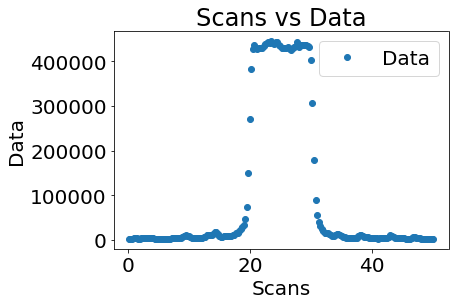

In [38]:
# Access the 'data' struct
data_struct = mat_contents['data']

# Access the inner array of 'scans'
scans = np.array(data_struct['scans'][0, 0][0][0][0])[0:200]

# Access 'data' array within the 'data' struct
data = np.array(data_struct['data'][0, 0][0][0]).flatten()[0:200]

# Display the values
print("Scans:", scans)
print("Data:", data)

# Plot the data
plt.plot(scans, data, 'o', label='Data')  # 'o' for plotting points
plt.xlabel('Scans')
plt.ylabel('Data')
plt.title('Scans vs Data')
plt.legend()
plt.show()


[5.82862401e+05 1.06063991e+01 2.51160820e+01]
[2.21988494e+03 1.77198163e-02 8.62966739e-03]


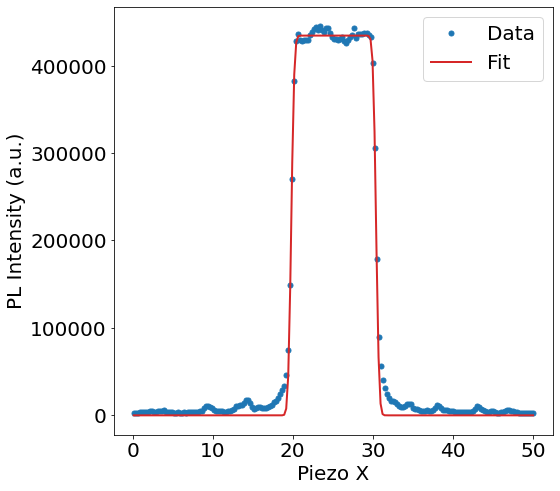

In [39]:
# Fit the data to the model
p0 = [400000, 10, 25]  # Initial guess for parameters
params, covariance = curve_fit(fit_equation, scans, data, p0=p0)
uncertainties = np.sqrt(np.diag(covariance))

print(params)
print(uncertainties)


plt.rcParams.update({'font.size': 20})
cm = 1/2.54 
plt.figure(figsize=(20*cm, 20*cm))
plt.xlabel('Piezo X')
plt.ylabel('PL Intensity (a.u.)')
plt.plot(scans, data, 'C0o', markersize = 5, label='Data')  # Blue dots for data
plt.plot(scans, fit_equation(scans, *params), 'C3-', lw = 2, label='Fit')  # Red line for fit
plt.legend()
plt.show()